# This is a **(not quite) cleared** version of notebook used during data preparation. Something may not work!

In [1]:
import pandas as pd
import numpy as np
import ast
import re

In [2]:
import sys
sys.path.insert(1, '../scripts/')

In [84]:
import importlib
import Transformer
importlib.reload(Transformer)
from Transformer import Transformer

In [85]:
df = pd.read_csv('../data/anilist_data_cleaned.csv', parse_dates=['release_date', 'end_date'])
df.tags = df.tags.apply(lambda x: ast.literal_eval(x))
df.studios = df.studios.apply(lambda x: ast.literal_eval(x))
df.producers = df.producers.apply(lambda x: ast.literal_eval(x))
df.genres = df.genres.apply(lambda x: ast.literal_eval(x))
df.description = df.description.fillna('')

df = df[['index', 'title', 'description', 'tags', 'is_adult', 'format',
              'episodes', 'status', 'end_date', 'release_date', 'season',
              'source', 'studios', 'producers', 'genres', 
              'duration', 'mean_score', 'popularity', 'favorites']]

df = Transformer(df)

In [86]:
df = df.transform_pipe()

In [87]:
df.info(memory_usage='deep')

<class 'Transformer.Transformer'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2570 entries, index to description_cleaned
dtypes: datetime64[ns](2), float16(337), float64(4), int32(1), object(2), uint8(2224)
memory usage: 52.7 MB


In [137]:
import bz2
import gzip
import lzma
import pickle
import brotli
import blosc
import mgzip

def compress(data):

    with open('no_compression.pickle', 'wb') as f:
        pickle.dump(data, f)

    with gzip.open("gzip_test.gz", "wb") as f:
        pickle.dump(data, f)

    with bz2.BZ2File('bz2_test.pbz2', 'wb') as f:
        pickle.dump(data, f)

    with lzma.open("lmza_test.xz", "wb") as f:
        pickle.dump(data, f)
        
    with mgzip.open('mgzip_test.gz', 'wb') as f:
        pickle.dump(data, f)

    pickled_data = pickle.dumps(data)
    compressed_pickle = blosc.compress(pickled_data)
    with open("blosc_test.dat", "wb") as f:
        f.write(compressed_pickle)

In [88]:
df.to_csv('to_csv.csv', index=False)

In [139]:
import tracemalloc

def uncompress(filename, comp_type):
    tracemalloc.start()
    
    if comp_type == 'gz':
        with gzip.open(filename, 'rb') as f:
            data = pickle.load(f)
            
    elif comp_type == 'uncompressed':
        with open(filename, 'rb') as f:
            data = pickle.load(f)
            
    elif comp_type == 'pbz2':
        with bz2.BZ2File(filename, 'rb') as f:
            data = pickle.load(f)
            
    elif comp_type == 'xz':
        with lzma.open(filename, "rb") as f:
            data = pickle.load(f)
           
    elif comp_type == 'mgzip':
        with mgzip.open(filename, 'rb') as f:
            data = pickle.load(f)
            
    elif comp_type == 'dat':
        with open(filename, "rb") as f:
            compressed_pickle = f.read()
            
        depressed_pickle = blosc.decompress(compressed_pickle)
        data = pickle.loads(depressed_pickle)
        
    _, peak = tracemalloc.get_traced_memory()
    print(comp_type)
    print(f"Peak {peak / 10**6:.2f} MB")
    print(np.all(data==df))
    tracemalloc.stop()
    
    return data

In [140]:
for filename, comp_type in zip(['no_compression.pickle', 'gzip_test.gz', 'bz2_test.pbz2', 'lmza_test.xz', 'mgzip_test.gz', "blosc_test.dat"],
                               ['uncompressed', 'gz', 'pbz2', 'xz', 'mgzip', 'dat']):
    uncompress(filename, comp_type)

uncompressed
Peak 213.78 MB
True
gz
Peak 101.45 MB
True
pbz2
Peak 87.36 MB
True
xz
Peak 106.80 MB
True
mgzip
Peak 416.94 MB
True
dat
Peak 116.15 MB
True


In [145]:
with gzip.open('../data/anilist_transformed.gz', 'wb') as f:
    pickle.dump(pd.DataFrame(df), f)

In [146]:
with gzip.open('../data/anilist_transformed.gz', 'rb') as f:
    data = pickle.load(f)

In [147]:
np.all(data == df)

True

In [123]:
data.info(memory_usage='deep')

<class 'Transformer.Transformer'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2570 entries, index to description_cleaned
dtypes: datetime64[ns](2), float16(337), float64(4), int32(1), object(2), uint8(2224)
memory usage: 52.7 MB


In [153]:
df.dtypes.values

array([dtype('int32'), dtype('O'), dtype('<M8[ns]'), ..., dtype('uint8'),
       dtype('uint8'), dtype('O')], dtype=object)

In [76]:
df['index'].astype(np.int32).info()

<class 'pandas.core.series.Series'>
RangeIndex: 16714 entries, 0 to 16713
Series name: index
Non-Null Count  Dtype
--------------  -----
16714 non-null  int32
dtypes: int32(1)
memory usage: 65.4 KB


In [73]:
df.info(memory_usage='deep')

<class 'Transformer.Transformer'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2570 entries, index to description_cleaned
dtypes: bool(2224), datetime64[ns](2), float16(337), float64(4), int64(1), object(2)
memory usage: 52.8 MB


In [59]:
df.info()

<class 'Transformer.Transformer'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2576 entries, index to description_cleaned
dtypes: bool(2224), datetime64[ns](2), float16(337), float64(4), int64(1), object(8)
memory usage: 48.1+ MB


In [57]:
df.loc[:, 'tags_4-koma':'tags_Zombie'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 337 entries, tags_4-koma to tags_Zombie
dtypes: float16(337)
memory usage: 10.7 MB


In [58]:
df['index'].dtype

dtype('int64')

In [60]:
df.select_dtypes('object')

,title,description,tags,status,studios,producers,genres,description_cleaned
0,Namake Gitsune,"Spring, the fox is in the middle of a party. W...","[(Achromatic, 79%)]",finished,[],[],[],spring fox middle party worker family raccoon ...
1,Doubutsu Tonarigumi,The Neighborhood Community (Tonari-gumi) was t...,"[(Animals, 20%)]",finished,[],[],[Comedy],neighborhood community tonarigumi smallest uni...
2,Kangaroo no Tanjoubi,A baby kangaroo's family and friends try to sa...,"[(Animals, 60%), (Achromatic, 20%)]",finished,[],[Kun Animation & Comic],[Adventure],baby kangaroo family friend try save bad old w...
3,Tie Shan Gongzhu,"Adapted from the popular Chinese folk tale ""Jo...","[(Classic Literature, 20%)]",finished,[],[],"[Action, Adventure, Fantasy]",adapted popular chinese folk tale journey west...
4,Ari-chan,"""Arichan the Ant finds a violin in a sandbox a...","[(Achromatic, 79%), (Animals, 60%), (No Dialog...",finished,[],[],"[Comedy, Music]",arichan ant find violin sandbox keep however r...
...,...,...,...,...,...,...,...,...
16709,World's End Harem,"The time is near future-Tokyo, Japan in 2040. ...","[(Female Harem, 96%), (Nudity, 88%), (Pandemic...",finished,"[AXsiZ, Studio Gokumi]","[Nippon Columbia, Yomiuri TV Enterprise, Shuei...","[Ecchi, Sci-Fi]",time near futuretokyo japan 2040 reito young m...
16710,#Ima made de Ichiban Yokatta Sex The Animation,Episode 1 (part 1)\n\nMaou to Himitsu Heya\nOu...,"[(Nudity, 60%), (Otaku Culture, 60%), (Virgini...",finished,[Shion],[Pink Pineapple],[Hentai],episode 1 part 1 maou himitsu heya hero quest ...
16711,Kyonyuu Onna Senshi Dogeza Saimin,Based on the erotic game by Lune.\n\nIn an iso...,"[(Elf, 20%), (MILF, 20%), (Nakadashi, 20%), (D...",finished,[Bunny Walker],[],"[Fantasy, Hentai]",based erotic game lune isolated island middle ...
16712,"Mori no Kuma-san, Toumin-chuu.",Nowa is a bear who lives in the forest. He fou...,"[(Boys' Love, 84%), (Kemonomimi, 60%), (Male P...",finished,[Studio Houkiboshi],[Black Flag],[Hentai],nowa bear life forest found puppy named airi y...


In [56]:
df.iloc[:, :20]

,index,title,description,tags,status,end_date,release_date,studios,producers,genres,duration,mean_score,popularity,favorites,tags_4-koma,tags_Achromatic,tags_Achronological Order,tags_Acting,tags_Adoption,tags_Advertisement
0,104354,Namake Gitsune,"Spring, the fox is in the middle of a party. W...","[(Achromatic, 79%)]",finished,1941-09-24,1941-09-24,[],[],[],0.042017,0.402439,0.000387,0.000018,0.0,0.790039,0.0,0.0,0.0,0.0
1,104418,Doubutsu Tonarigumi,The Neighborhood Community (Tonari-gumi) was t...,"[(Animals, 20%)]",finished,1941-09-24,1941-09-24,[],[],[Comedy],0.037815,0.390244,0.000252,0.000018,0.0,0.000000,0.0,0.0,0.0,0.0
2,6843,Kangaroo no Tanjoubi,A baby kangaroo's family and friends try to sa...,"[(Animals, 60%), (Achromatic, 20%)]",finished,1941-02-15,1941-02-15,[],[Kun Animation & Comic],[Adventure],0.033613,0.451220,0.000626,0.000018,0.0,0.199951,0.0,0.0,0.0,0.0
3,9521,Tie Shan Gongzhu,"Adapted from the popular Chinese folk tale ""Jo...","[(Classic Literature, 20%)]",finished,1941-01-01,1941-01-01,[],[],"[Action, Adventure, Fantasy]",0.302521,0.439024,0.000521,0.000054,0.0,0.000000,0.0,0.0,0.0,0.0
4,102526,Ari-chan,"""Arichan the Ant finds a violin in a sandbox a...","[(Achromatic, 79%), (Animals, 60%), (No Dialog...",finished,1941-09-24,1941-09-24,[],[],"[Comedy, Music]",0.042017,0.426829,0.000653,0.000018,0.0,0.790039,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,118465,World's End Harem,"The time is near future-Tokyo, Japan in 2040. ...","[(Female Harem, 96%), (Nudity, 88%), (Pandemic...",finished,2022-03-18,2022-01-07,"[AXsiZ, Studio Gokumi]","[Nippon Columbia, Yomiuri TV Enterprise, Shuei...","[Ecchi, Sci-Fi]",0.096639,0.560976,0.079444,0.014982,0.0,0.000000,0.0,0.0,0.0,0.0
16710,146951,#Ima made de Ichiban Yokatta Sex The Animation,Episode 1 (part 1)\n\nMaou to Himitsu Heya\nOu...,"[(Nudity, 60%), (Otaku Culture, 60%), (Virgini...",finished,2022-06-24,2022-06-24,[Shion],[Pink Pineapple],[Hentai],0.067227,0.670732,0.001060,0.000413,0.0,0.000000,0.0,0.0,0.0,0.0
16711,146282,Kyonyuu Onna Senshi Dogeza Saimin,Based on the erotic game by Lune.\n\nIn an iso...,"[(Elf, 20%), (MILF, 20%), (Nakadashi, 20%), (D...",finished,2022-06-03,2022-06-03,[Bunny Walker],[],"[Fantasy, Hentai]",0.079832,0.707317,0.001197,0.000557,0.0,0.000000,0.0,0.0,0.0,0.0
16712,136796,"Mori no Kuma-san, Toumin-chuu.",Nowa is a bear who lives in the forest. He fou...,"[(Boys' Love, 84%), (Kemonomimi, 60%), (Male P...",finished,2022-09-12,2022-07-04,[Studio Houkiboshi],[Black Flag],[Hentai],0.025210,0.670732,0.000720,0.000251,0.0,0.000000,0.0,0.0,0.0,0.0


In [32]:
df.iloc[0].tags_Achromatic.astype(np.float16)

0.79

In [28]:
np.finfo(df.iloc[0].tags_Achromatic.astype(np.float16)).precision

3

In [37]:
pd.DataFrame(df.loc[:, 'studios_10GAUGE':'source_web novel']).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2224 entries, studios_10GAUGE to source_web novel
dtypes: int64(2185), uint8(39)
memory usage: 279.2 MB


In [38]:
pd.DataFrame(df.loc[:, 'studios_10GAUGE':'source_web novel'], dtype=np.bool_).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2224 entries, studios_10GAUGE to source_web novel
dtypes: bool(2224)
memory usage: 35.5 MB


In [39]:
np.argwhere(~np.isin(df.loc[:, 'studios_10GAUGE':'source_web novel'].values, [0, 1]))

array([], shape=(0, 2), dtype=int64)

In [20]:
df.loc[:, 'studios_10GAUGE':'source_web novel'].astype(np.bool_).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 2224 entries, studios_10GAUGE to source_web novel
dtypes: bool(2224)
memory usage: 35.5 MB


In [16]:
df.columns.values[:1000]

array(['index', 'title', 'description', 'tags', 'status', 'end_date',
       'release_date', 'studios', 'producers', 'genres', 'duration',
       'mean_score', 'popularity', 'favorites', 'tags_4-koma',
       'tags_Achromatic', 'tags_Achronological Order', 'tags_Acting',
       'tags_Adoption', 'tags_Advertisement', 'tags_Afterlife',
       'tags_Age Gap', 'tags_Age Regression', 'tags_Agender',
       'tags_Agriculture', 'tags_Ahegao', 'tags_Airsoft', 'tags_Alchemy',
       'tags_Aliens', 'tags_Alternate Universe', 'tags_American Football',
       'tags_Amnesia', 'tags_Amputation', 'tags_Anachronism',
       'tags_Anal Sex', 'tags_Angels', 'tags_Animals', 'tags_Anthology',
       'tags_Anthropomorphism', 'tags_Anti-Hero', 'tags_Archery',
       'tags_Armpits', 'tags_Artificial Intelligence', 'tags_Asexual',
       'tags_Ashikoki', 'tags_Asphyxiation', 'tags_Assassins',
       'tags_Astronomy', 'tags_Athletics', 'tags_Augmented Reality',
       'tags_Autobiographical', 'tags_Aviation', 

In [11]:
df.loc[:, 'duration':'source_web novel']

,duration,mean_score,popularity,favorites,tags_4-koma,tags_Achromatic,tags_Achronological Order,tags_Acting,tags_Adoption,tags_Advertisement,...,source_manga,source_multimedia project,source_novel,source_original,source_other,source_picture book,source_unspecified,source_video game,source_visual novel,source_web novel
0,0.042017,0.402439,0.000387,0.000018,0.0,0.79,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0.037815,0.390244,0.000252,0.000018,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.033613,0.451220,0.000626,0.000018,0.0,0.20,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0.302521,0.439024,0.000521,0.000054,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.042017,0.426829,0.000653,0.000018,0.0,0.79,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,0.096639,0.560976,0.079444,0.014982,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
16710,0.067227,0.670732,0.001060,0.000413,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
16711,0.079832,0.707317,0.001197,0.000557,0.0,0.00,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
16712,0.025210,0.670732,0.000720,0.000251,0.0,0.00,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [482]:
df.to_csv('anilist_transformed.csv', index=False)

In [414]:
df.iloc[16709]

index                                                             118465
title                                                  World's End Harem
description            The time is near future-Tokyo, Japan in 2040. ...
tags                   [(Female Harem, 96%), (Nudity, 88%), (Pandemic...
status                                                          finished
                                             ...                        
source_unspecified                                                     0
source_video game                                                      0
source_visual novel                                                    0
source_web novel                                                       0
description_cleaned    time near futuretokyo japan 2040 reito young m...
Name: 16709, Length: 2576, dtype: object

In [413]:
df.loc[:, 'duration':'favorites']

,duration,mean_score,popularity,favorites
0,11,43.0,240,1
1,10,42.0,157,1
2,9,47.0,386,1
3,73,46.0,322,3
4,11,45.0,403,1
...,...,...,...,...
16709,24,56.0,48647,834
16710,17,65.0,652,23
16711,20,68.0,736,31
16712,7,65.0,444,14


In [405]:
df.columns.values[:25]

array(['index', 'title', 'description', 'tags', 'status', 'end_date',
       'release_date', 'studios', 'producers', 'genres', 'duration',
       'mean_score', 'popularity', 'favorites', 'tags_4-koma',
       'tags_Achromatic', 'tags_Achronological Order', 'tags_Acting',
       'tags_Adoption', 'tags_Advertisement', 'tags_Afterlife',
       'tags_Age Gap', 'tags_Age Regression', 'tags_Agender',
       'tags_Agriculture'], dtype=object)

In [ ]:
df.duration

0        11
1        10
2         9
3        73
4        11
         ..
16709    24
16710    17
16711    20
16712     7
16713    20
Name: duration, Length: 16714, dtype: int64

In [163]:
df.description_cleaned

0        spring fox middle party worker family raccoon ...
1        neighborhood community tonarigumi smallest uni...
2        baby kangaroo family friend try save bad old w...
3        adapted popular chinese folk tale journey west...
4        arichan ant find violin sandbox keep however r...
                               ...                        
16709    time near futuretokyo japan 2040 reito young m...
16710    episode 1 part 1 maou himitsu heya hero quest ...
16711    based erotic game lune isolated island middle ...
16712    nowa bear life forest found puppy named airi y...
16713    exists sex life guidance notebook someone writ...
Name: description_cleaned, Length: 16714, dtype: object

In [10]:
df.info()

<class 'Transformer.Transformer'>
RangeIndex: 16714 entries, 0 to 16713
Columns: 356 entries, index to tag_augmented_reality
dtypes: bool(1), datetime64[ns](2), float64(338), int64(6), object(9)
memory usage: 45.3+ MB


In [172]:
df.info()

<class 'Transformer.Transformer'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         16714 non-null  int64         
 1   title         16714 non-null  object        
 2   description   16714 non-null  object        
 3   tags          16714 non-null  object        
 4   is_adult      16714 non-null  bool          
 5   format        16714 non-null  object        
 6   episodes      16714 non-null  category      
 7   status        16714 non-null  object        
 8   end_date      16714 non-null  datetime64[ns]
 9   release_date  16714 non-null  datetime64[ns]
 10  season        16714 non-null  int64         
 11  mean_score    16714 non-null  float64       
 12  popularity    16714 non-null  int64         
 13  favorites     16714 non-null  int64         
 14  source        16714 non-null  object        
 15  studios       16714 non-null  object    

In [126]:
pd.DataFrame(pd.get_dummies(df, columns=['is_adult', 'format', 'origin', 'episodes', 'season', 'source']))

,index,title,description,tags,status,end_date,release_date,mean_score,popularity,favorites,...,source_manga,source_multimedia project,source_novel,source_original,source_other,source_picture book,source_unspecified,source_video game,source_visual novel,source_web novel
0,104354,Namake Gitsune,"Spring, the fox is in the middle of a party. W...","[(Achromatic, 79%)]",finished,1941-09-24,1941-09-24,43.0,240,1,...,0,0,0,1,0,0,0,0,0,0
1,104418,Doubutsu Tonarigumi,The Neighborhood Community (Tonari-gumi) was t...,"[(Animals, 20%)]",finished,1941-09-24,1941-09-24,42.0,157,1,...,0,0,0,1,0,0,0,0,0,0
2,6843,Kangaroo no Tanjoubi,A baby kangaroo's family and friends try to sa...,"[(Animals, 60%), (Achromatic, 20%)]",finished,1941-02-15,1941-02-15,47.0,386,1,...,0,0,0,1,0,0,0,0,0,0
3,9521,Tie Shan Gongzhu,"Adapted from the popular Chinese folk tale ""Jo...","[(Classic Literature, 20%)]",finished,1941-01-01,1941-01-01,46.0,322,3,...,0,0,1,0,0,0,0,0,0,0
4,102526,Ari-chan,"""Arichan the Ant finds a violin in a sandbox a...","[(Achromatic, 79%), (Animals, 60%), (No Dialog...",finished,1941-09-24,1941-09-24,45.0,403,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,118465,World's End Harem,"The time is near future-Tokyo, Japan in 2040. ...","[(Female Harem, 96%), (Nudity, 88%), (Pandemic...",finished,2022-03-18,2022-01-07,56.0,48647,834,...,1,0,0,0,0,0,0,0,0,0
16710,146951,#Ima made de Ichiban Yokatta Sex The Animation,Episode 1 (part 1)\n\nMaou to Himitsu Heya\nOu...,"[(Nudity, 60%), (Otaku Culture, 60%), (Virgini...",finished,2022-06-24,2022-06-24,65.0,652,23,...,1,0,0,0,0,0,0,0,0,0
16711,146282,Kyonyuu Onna Senshi Dogeza Saimin,Based on the erotic game by Lune.\n\nIn an iso...,"[(Elf, 20%), (MILF, 20%), (Nakadashi, 20%), (D...",finished,2022-06-03,2022-06-03,68.0,736,31,...,0,0,0,0,0,0,0,0,1,0
16712,136796,"Mori no Kuma-san, Toumin-chuu.",Nowa is a bear who lives in the forest. He fou...,"[(Boys' Love, 84%), (Kemonomimi, 60%), (Male P...",finished,2022-09-12,2022-07-04,65.0,444,14,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot: ylabel='Frequency'>

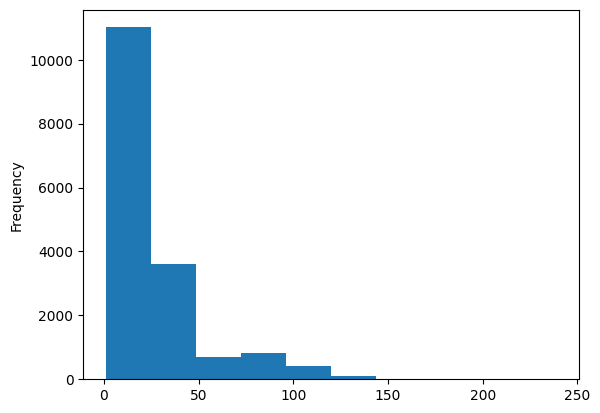

In [87]:
df.duration.plot(kind='hist')

In [66]:
df.query('episodes < 2').episodes.shape

(8005,)

In [67]:
df.query('episodes > 1 and episodes < 8').episodes.shape

(2781,)

In [68]:
df.query('episodes > 7 and episodes < 15').episodes.shape

(2972,)

In [69]:
df.query('episodes > 14 and episodes < 27').episodes.shape

(1442,)

In [70]:
df.query('episodes > 26').episodes.shape

(1514,)

In [72]:
df.episodes

0         1
1         1
2         1
3         1
4         1
         ..
16709    11
16710     2
16711     2
16712     9
16713     2
Name: episodes, Length: 16714, dtype: int64

In [83]:
pd.cut(df.episodes, bins=[0, 1, 7, 13, 26, float('inf')], labels=['single', 'short', 'average', 'double_average', 'long'])

0         single
1         single
2         single
3         single
4         single
          ...   
16709    average
16710      short
16711      short
16712    average
16713      short
Name: episodes, Length: 16714, dtype: category
Categories (5, object): ['single' < 'short' < 'average' < 'double_average' < 'long']

<AxesSubplot: ylabel='Frequency'>

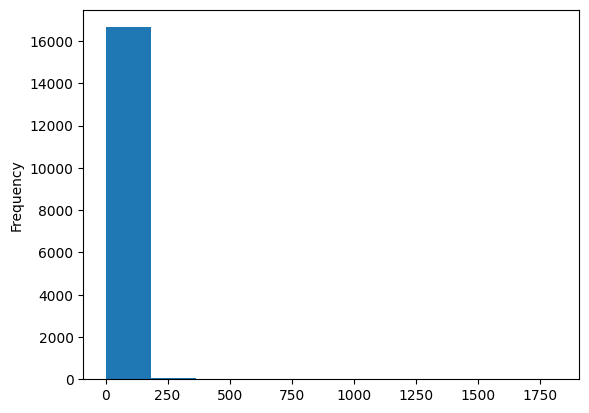

In [60]:
df.episodes.plot(kind='hist')

In [125]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         16714 non-null  int64         
 1   title         16714 non-null  object        
 2   description   16714 non-null  object        
 3   tags          16714 non-null  object        
 4   is_adult      16714 non-null  bool          
 5   format        16714 non-null  object        
 6   episodes      16714 non-null  int64         
 7   status        16714 non-null  object        
 8   end_date      16714 non-null  datetime64[ns]
 9   release_date  16714 non-null  datetime64[ns]
 10  season        16714 non-null  int64         
 11  mean_score    16714 non-null  float64       
 12  popularity    16714 non-null  int64         
 13  favorites     16714 non-null  int64         
 14  source        16714 non-null  object        
 15  studios       16714 non-null  object

In [50]:
tags_dict = {key: 0 for key in set(np.hstack(df.tags.apply(lambda x: ['tag_' + i[0].lower().replace(' ', '_') for i in x]).values))}

In [51]:
tags_dict

{'tag_musical': 0,
 'tag_asexual': 0,
 'tag_josei': 0,
 'tag_nun': 0,
 'tag_gyaru': 0,
 'tag_achronological_order': 0,
 'tag_slavery': 0,
 'tag_no_dialogue': 0,
 'tag_classic_literature': 0,
 'tag_football': 0,
 'tag_isekai': 0,
 'tag_satire': 0,
 'tag_mixed_gender_harem': 0,
 'tag_urban': 0,
 'tag_language_barrier': 0,
 'tag_politics': 0,
 'tag_robots': 0,
 'tag_denpa': 0,
 'tag_swimming': 0,
 'tag_yakuza': 0,
 'tag_anal_sex': 0,
 'tag_zombie': 0,
 'tag_gore': 0,
 'tag_threesome': 0,
 'tag_pandemic': 0,
 'tag_animals': 0,
 'tag_angels': 0,
 'tag_nekomimi': 0,
 'tag_chimera': 0,
 'tag_otaku_culture': 0,
 'tag_primarily_child_cast': 0,
 'tag_real_robot': 0,
 'tag_terrorism': 0,
 'tag_male_protagonist': 0,
 'tag_scissoring': 0,
 'tag_human_pet': 0,
 'tag_guns': 0,
 'tag_flash': 0,
 'tag_achromatic': 0,
 'tag_blackmail': 0,
 'tag_rape': 0,
 'tag_biographical': 0,
 'tag_steampunk': 0,
 'tag_tomboy': 0,
 'tag_dungeon': 0,
 'tag_baseball': 0,
 'tag_bullying': 0,
 'tag_bisexual': 0,
 'tag_bon

In [14]:
def transform_tags(l):
    d = tags_dict.copy()
    for i in l:
        d[i[0]] = int(i[1].replace('%', ''))/100

    return d

In [ ]:
df.tags.apply(transform_tags)

0        {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
1        {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
2        {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
3        {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
4        {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
                               ...                        
16709    {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
16710    {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
16711    {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
16712    {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
16713    {'Skateboarding': 0, 'Nekomimi': 0, 'Skeleton'...
Name: tags, Length: 16714, dtype: object

In [39]:
tags_matrix = pd.DataFrame(df.tags.apply(transform_tags).values.tolist())

In [40]:
tags_matrix

,Skateboarding,Nekomimi,Skeleton,Pirates,Spearplay,Satire,Boxing,Sumata,Fitness,Heterosexual,...,Makeup,Shapeshifting,Centaur,Real Robot,CGI,Boys' Love,Achronological Order,Puppetry,Work,Dinosaurs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.84,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
16710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
16711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
16712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.84,0.0,0.0,0.0,0.0


In [37]:
pd.concat([df, ], axis=1)

,index,title,description,tags,is_adult,format,episodes,status,end_date,release_date,...,Dullahan,Cunnilingus,Non-fiction,Boys' Love,4-koma,Space,American Football,Delinquents,Basketball,Skeleton
0,104354,Namake Gitsune,"Spring, the fox is in the middle of a party. W...","[(Achromatic, 79%)]",False,movie,1,finished,1941-09-24,1941-09-24,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,104418,Doubutsu Tonarigumi,The Neighborhood Community (Tonari-gumi) was t...,"[(Animals, 20%)]",False,movie,1,finished,1941-09-24,1941-09-24,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,6843,Kangaroo no Tanjoubi,A baby kangaroo's family and friends try to sa...,"[(Animals, 60%), (Achromatic, 20%)]",False,movie,1,finished,1941-02-15,1941-02-15,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,9521,Tie Shan Gongzhu,"Adapted from the popular Chinese folk tale ""Jo...","[(Classic Literature, 20%)]",False,movie(chinese),1,finished,1941-01-01,1941-01-01,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,102526,Ari-chan,"""Arichan the Ant finds a violin in a sandbox a...","[(Achromatic, 79%), (Animals, 60%), (No Dialog...",False,movie,1,finished,1941-09-24,1941-09-24,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,118465,World's End Harem,"The time is near future-Tokyo, Japan in 2040. ...","[(Female Harem, 96%), (Nudity, 88%), (Pandemic...",True,tv,11,finished,2022-03-18,2022-01-07,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
16710,146951,#Ima made de Ichiban Yokatta Sex The Animation,Episode 1 (part 1)\n\nMaou to Himitsu Heya\nOu...,"[(Nudity, 60%), (Otaku Culture, 60%), (Virgini...",True,ova,2,finished,2022-06-24,2022-06-24,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
16711,146282,Kyonyuu Onna Senshi Dogeza Saimin,Based on the erotic game by Lune.\n\nIn an iso...,"[(Elf, 20%), (MILF, 20%), (Nakadashi, 20%), (D...",True,ova,2,finished,2022-06-03,2022-06-03,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
16712,136796,"Mori no Kuma-san, Toumin-chuu.",Nowa is a bear who lives in the forest. He fou...,"[(Boys' Love, 84%), (Kemonomimi, 60%), (Male P...",True,ona,9,finished,2022-09-12,2022-07-04,...,0.0,0.0,0.0,0.84,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.format.value_counts()

tv                        3692
ova                       3477
movie                     2834
music                     1769
special                   1571
ona                       1177
tv short                   869
ona(chinese)               629
movie(chinese)             187
movie(south korean)        137
tv short(chinese)          100
tv(chinese)                 94
tv(south korean)            51
tv short(south korean)      28
ona(south korean)           28
ona(doujin)                 19
tv(taiwanese)               12
movie(doujin)               10
ona(taiwanese)               8
ova(south korean)            5
movie(taiwanese)             4
special(chinese)             4
ova(chinese)                 3
special(doujin)              2
music(doujin)                2
ova(doujin)                  1
special(south korean)        1
Name: format, dtype: int64

In [ ]:
def transform_format():
    df['origin'] = df.format.apply(lambda x: re.search(r'\((.+)\)', x).group(1) if '(' in x else 'japanese')
    df.format = df.format.apply(lambda x: re.search(r'(.+)\(', x).group(1) if '(' in x else x).value_counts()

In [41]:
df

,index,title,description,tags,is_adult,format,episodes,status,end_date,release_date,season,mean_score,popularity,favorites,source,studios,producers,genres,duration
0,104354,Namake Gitsune,"Spring, the fox is in the middle of a party. W...","[(Achromatic, 79%)]",False,movie,1,finished,1941-09-24,1941-09-24,2,43.0,240,1,original,[],[],[],11
1,104418,Doubutsu Tonarigumi,The Neighborhood Community (Tonari-gumi) was t...,"[(Animals, 20%)]",False,movie,1,finished,1941-09-24,1941-09-24,2,42.0,157,1,original,[],[],['Comedy'],10
2,6843,Kangaroo no Tanjoubi,A baby kangaroo's family and friends try to sa...,"[(Animals, 60%), (Achromatic, 20%)]",False,movie,1,finished,1941-02-15,1941-02-15,0,47.0,386,1,original,[],['Kun Animation & Comic'],['Adventure'],9
3,9521,Tie Shan Gongzhu,"Adapted from the popular Chinese folk tale ""Jo...","[(Classic Literature, 20%)]",False,movie(chinese),1,finished,1941-01-01,1941-01-01,0,46.0,322,3,novel,[],[],"['Action', 'Adventure', 'Fantasy']",73
4,102526,Ari-chan,"""Arichan the Ant finds a violin in a sandbox a...","[(Achromatic, 79%), (Animals, 60%), (No Dialog...",False,movie,1,finished,1941-09-24,1941-09-24,2,45.0,403,1,original,[],[],"['Comedy', 'Music']",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,118465,World's End Harem,"The time is near future-Tokyo, Japan in 2040. ...","[(Female Harem, 96%), (Nudity, 88%), (Pandemic...",True,tv,11,finished,2022-03-18,2022-01-07,0,56.0,48647,834,manga,"['AXsiZ', 'Studio Gokumi']","['Nippon Columbia', 'Yomiuri TV Enterprise', '...","['Ecchi', 'Sci-Fi']",24
16710,146951,#Ima made de Ichiban Yokatta Sex The Animation,Episode 1 (part 1)\n\nMaou to Himitsu Heya\nOu...,"[(Nudity, 60%), (Otaku Culture, 60%), (Virgini...",True,ova,2,finished,2022-06-24,2022-06-24,1,65.0,652,23,manga,['Shion'],['Pink Pineapple'],['Hentai'],17
16711,146282,Kyonyuu Onna Senshi Dogeza Saimin,Based on the erotic game by Lune.\n\nIn an iso...,"[(Elf, 20%), (MILF, 20%), (Nakadashi, 20%), (D...",True,ova,2,finished,2022-06-03,2022-06-03,1,68.0,736,31,visual novel,['Bunny Walker'],[],"['Fantasy', 'Hentai']",20
16712,136796,"Mori no Kuma-san, Toumin-chuu.",Nowa is a bear who lives in the forest. He fou...,"[(Boys' Love, 84%), (Kemonomimi, 60%), (Male P...",True,ona,9,finished,2022-09-12,2022-07-04,2,65.0,444,14,manga,['Studio Houkiboshi'],['Black Flag'],['Hentai'],7


In [77]:
def to_dummies():
    df = pd.concat([df, pd.get_dummies(df.source), pd.get_dummies(df.format), pd.get_dummies(df.origin)], axis=1)
    return df

,anime,comic,doujinshi,game,light novel,live action,manga,multimedia project,novel,original,other,picture book,unspecified,video game,visual novel,web novel
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16710,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16712,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [143]:
pd.get_dummies(df.source)

,anime,comic,doujinshi,game,light novel,live action,manga,multimedia project,novel,original,other,picture book,unspecified,video game,visual novel,web novel
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16709,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16710,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16711,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16712,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [475]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances

In [80]:
df.description

0        Spring, the fox is in the middle of a party. W...
1        The Neighborhood Community (Tonari-gumi) was t...
2        A baby kangaroo's family and friends try to sa...
3        Adapted from the popular Chinese folk tale "Jo...
4        "Arichan the Ant finds a violin in a sandbox a...
                               ...                        
16709    The time is near future-Tokyo, Japan in 2040. ...
16710    Episode 1 (part 1)\n\nMaou to Himitsu Heya\nOu...
16711    Based on the erotic game by Lune.\n\nIn an iso...
16712    Nowa is a bear who lives in the forest. He fou...
16713    There exists a sex life guidance notebook. Whe...
Name: description, Length: 16714, dtype: object

In [89]:
clean_data(df.description[999])

'An old man and his granddaughter found a wounded fawn while searching for Chinese medicinal herbs in the mountains Under the girls careful care the fawn gradually recovered and became an inseparable friend with the girl \n \nSource Douban'

In [92]:
df.description[10000]

'The anime promises a "new and novel \'sleeping side-by-side\' experience entirely in the first-person perspective" to "heal tired hearts." It revolved around 12 "makura no danshi" (pillow boys), all full of distinctly individual personalities and each catering to viewers who like a certain "type." The boys all live in the same town underneath a starry sky. Each of the "makura no danshi" will star his own weekly episode as they "sleep beside you and whisper."'

In [91]:
clean_data(df.description[10000])

'The anime promises a new and novel sleeping sidebyside experience entirely in the firstperson perspective to heal tired hearts It revolved around 12 makura no danshi pillow boys all full of distinctly individual personalities and each catering to viewers who like a certain type The boys all live in the same town underneath a starry sky Each of the makura no danshi will star his own weekly episode as they sleep beside you and whisper'

In [93]:
apply_stopwords(to_lower(clean_data(df.description.iloc[0])))

'spring fox middle party workers family raccoon dogs reveal field work hot summer harvest autumn fox stupidly hunts raccoon dumplings carrying harvest perspiration raccoon dog wears takes away food rabbit cold winter comes raccoon family good time around hearth fox troubled food wandering snow fox intends collective battle raises fire fire causes fire tries rob storage raccoon warehouse raccoon dog turns truck turns fox escaped storage turns rainbow chases fight fox rac'

In [155]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

stopwords_list = stopwords.words("english")

def clean_text(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    return text


def to_lower(text):
    text = text.lower()
    return text


def apply_stopwords(text):
    text_tokens = text.replace('\n', ' ').replace('\t', ' ').split(' ')
    final_list = [word for word in text_tokens if word not in stopwords_list]
    text = ' '.join(final_list)
    return text

def lemmization(text):
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text.split()]
    return text

def text_pipe(text):
    text = clean_text(text)
    text = to_lower(text)
    text = apply_stopwords(text)
    text = lemmization(text)
    return text



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alimu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alimu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [157]:
import importlib
import TextProcessor
importlib.reload(TextProcessor)
from TextProcessor import TextProcessor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alimu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alimu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
TextProcessor(df.description.iloc[0]).text_pipe()

'spring fox middle party worker family raccoon dog reveal field work hot summer harvest autumn fox stupidly hunt raccoon dumpling carrying harvest perspiration raccoon dog wear take away food rabbit cold winter come raccoon family good time around hearth fox troubled food wandering snow fox intends collective battle raise fire fire cause fire try rob storage raccoon warehouse raccoon dog turn truck turn fox escaped storage turn rainbow chase fight fox rac'

"Spring, the fox is in the middle of a party. Workers' family of raccoon dogs reveal their field work during the hot summer and harvest autumn. A fox who stupidly hunts the Raccoon dumplings carrying the harvest with perspiration, before the raccoon dog wears it, takes away the food of the rabbit. A cold winter comes. The Raccoon family is having a good time around the hearth, but the fox is troubled with food and wandering in the snow. The fox intends a collective battle, raises a fire from the fire, causes a fire, and tries to rob the storage of the raccoon warehouse. A raccoon dog that turns into a truck and turns a fox that escaped a storage, turns it into a rainbow and chases it. The fight between the fox and the rac..."

In [156]:
df['description_cleaned'] = df.description.apply(text_pipe)

In [160]:
def get_w2vdf(df):
    texts = df.description_cleaned.values.tolist()
    w2v_df = []
    for i in texts:
        w2v_df += i
    return w2v_df

wordlist = get_w2vdf(df)

In [165]:
import multiprocessing
from gensim.models import Word2Vec

def train_w2v(w2v_df):
    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=4,
                         window=4,
                         vector_size=300, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         sg = 1,
                         workers=cores-1)
    
    w2v_model.build_vocab(w2v_df, progress_per=10000)
    w2v_model.train(w2v_df, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)
    return w2v_model

In [192]:
w2v_model = train_w2v(df.description_cleaned.apply(lambda x: ' '.join(x)).values.tolist())

In [126]:
rng = np.random.default_rng()
for i in rng.choice(len(df), size=10, replace=False).tolist() + [999, 10000]:
    print('BEFORE')
    print(df.description[i])
    print('\nAFTER')
    print(apply_stopwords(to_lower(clean_text(df.description.iloc[i]))))
    print('\n-----------------------------------------------------\n')

BEFORE
Music video for the song Still by the fictional band Irodorimidori spawned from Sega's Chunithm rhythm arcade game.
Note: Still is the 19th song in the Irodorimidori series.

AFTER
music video song still fictional band irodorimidori spawned segas chunithm rhythm arcade game note still 19th song irodorimidori series

-----------------------------------------------------

BEFORE
The story centers around Yuuto Ayase and his classmate Haruka Nogizaka. While Yuuto is rather ordinary, Haruka is very attractive, intelligent and rich. Due to this, she is the school's most unattainable girl and is so idolized that her classmates give her the French nicknames "Nuit Étoile" (The Silver Star of the Night) and "Lumière du Clavier" (The Shining Princess on the Piano). One day, when Yuuto goes to the school library to return a book, he stumbles across Haruka and her darkest secret—she is a diehard fan of anime, manga and the otaku culture. Yuuto promises to keep her secret hidden and the two b

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [197]:
df.description_cleaned.apply(lambda x: ' '.join(x))

0        spring fox middle party worker family raccoon ...
1        neighborhood community tonarigumi smallest uni...
2        baby kangaroo family friend try save bad old w...
3        adapted popular chinese folk tale journey west...
4        arichan ant find violin sandbox keep however r...
                               ...                        
16709    time near futuretokyo japan 2040 reito young m...
16710    episode 1 part 1 maou himitsu heya hero quest ...
16711    based erotic game lune isolated island middle ...
16712    nowa bear life forest found puppy named airi y...
16713    exists sex life guidance notebook someone writ...
Name: description_cleaned, Length: 16714, dtype: object

In [200]:
tfidf_matrix = tfidf.fit_transform(df.description_cleaned.apply(lambda x: ' '.join(x)))

In [177]:
cos_tmp = linear_kernel(df.loc[:, 'tag_sweat':'source_web novel'], df.loc[:, 'tag_sweat':'source_web novel'])

In [361]:
cos_tmp1 = linear_kernel(df.loc[:, 'tags_4-koma':'source_web novel'], df.loc[:, 'tags_4-koma':'source_web novel']) 

In [408]:
cos_tmp2 = linear_kernel(df.loc[:, 'duration':'source_web novel'], df.loc[:, 'duration':'source_web novel'])

In [434]:
cos_tmp3 = linear_kernel(df.loc[:, 'duration':'source_web novel'], df.loc[:, 'duration':'source_web novel'])

In [457]:
cos_tmp4 = linear_kernel(df.loc[:, 'duration':'source_web novel'], df.loc[:, 'duration':'source_web novel'])

In [467]:
cos_tmp5 = linear_kernel(df.loc[:, 'duration':'source_web novel'], df.loc[:, 'duration':'source_web novel'])

In [476]:
cos_tmp6 = euclidean_distances(df.loc[:, 'duration':'source_web novel'], df.loc[:, 'duration':'source_web novel'])

In [252]:
np.argsort(-cos_tmp[8638])[:10]

array([ 8638, 11835, 13813, 12821, 12340, 13725, 15028,  2871,  6626,
        7877], dtype=int64)

In [209]:
np.argsort(-cos_tmp[8638])[:20]

array([ 8638, 11835, 13813, 12821, 12340, 15028,  6626, 13369, 14870,
       13725,  2871,  7877, 13304,  9855, 12715, 14860,  6142,  9131,
       14073,  5574], dtype=int64)

In [362]:
np.argsort(-cos_tmp1[8638])[:20]

array([ 8638, 11835, 12821, 13813, 12340, 15028,  9006, 13304, 13725,
        6626, 11321,  9855, 13369, 14860,  2871,  9437,  7616, 13177,
        7988, 13367], dtype=int64)

In [459]:
df.loc[:, 'duration':'popularity']

,duration,mean_score,popularity
0,0.042017,0.402439,0.000387
1,0.037815,0.390244,0.000252
2,0.033613,0.451220,0.000626
3,0.302521,0.439024,0.000521
4,0.042017,0.426829,0.000653
...,...,...,...
16709,0.096639,0.560976,0.079444
16710,0.067227,0.670732,0.001060
16711,0.079832,0.707317,0.001197
16712,0.025210,0.670732,0.000720


In [477]:
pd.concat([
    df.iloc[np.argsort(-cos_tmp[8638])[:50]].title.reset_index(drop=True).rename('col1'),  # without genres etc.
    df.iloc[np.argsort(-cos_tmp1[8638])[:50]].title.reset_index(drop=True).rename('col2'), # including genres etc.
    df.iloc[np.argsort(-cos_tmp2[8638])[:50]].title.reset_index(drop=True).rename('col3'), # unscaled score, favorites
    df.iloc[np.argsort(-cos_tmp3[8638])[:50]].title.reset_index(drop=True).rename('col4'), # standardscale score, favorites
    df.iloc[np.argsort(-cos_tmp4[8638])[:50]].title.reset_index(drop=True).rename('col5'), # minmaxscale score, favorites
    df.iloc[np.argsort(-cos_tmp5[8638])[:50]].title.reset_index(drop=True).rename('col6'), # normalizer score, favorites
    df.iloc[np.argsort(-cos_tmp6[8638])[:50]].title.reset_index(drop=True).rename('col6'), # euclidian distance with normalizer
], axis=1, ignore_index=True, )

,0,1,2,3,4,5,6
0,Attack on Titan,Attack on Titan,Attack on Titan,Hunter x Hunter (2011),Attack on Titan,Attack on Titan,I've Been Killing Slimes for 300 Years and Max...
1,Attack on Titan Season 2,Attack on Titan Season 2,Demon Slayer: Kimetsu no Yaiba,Attack on Titan,Attack on Titan Season 2,Attack on Titan Season 2,Redo of Healer
2,Attack on Titan Final Season,Attack on Titan Season 3 Part 2,Death Note,Demon Slayer: Kimetsu no Yaiba,Attack on Titan Season 3 Part 2,Attack on Titan Season 3 Part 2,Kuma Kuma Kuma Bear
3,Attack on Titan Season 3 Part 2,Attack on Titan Final Season,My Hero Academia,JUJUTSU KAISEN,Attack on Titan Final Season,Attack on Titan Final Season,Drug Store in Another World - The Slow Life of...
4,Attack on Titan Season 3,Attack on Titan Season 3,Hunter x Hunter (2011),Fullmetal Alchemist: Brotherhood,Attack on Titan Season 3,Attack on Titan Season 3,FLIP FLAPPERS
5,Attack on Titan Final Season Part 2,Attack on Titan Final Season Part 2,JUJUTSU KAISEN,Death Note,Attack on Titan Final Season Part 2,Attack on Titan Final Season Part 2,Koikimo
6,Fullmetal Alchemist: Brotherhood,Attack on Titan OVA,One-Punch Man,A Silent Voice,VINLAND SAGA,Attack on Titan OVA,KONOSUBA -God's blessing on this wonderful wor...
7,Demon Slayer: Kimetsu no Yaiba,VINLAND SAGA,Tokyo Ghoul,Steins;Gate,Fullmetal Alchemist: Brotherhood,VINLAND SAGA,"Science Fell in Love, So I Tried to Prove It r..."
8,To Your Eternity,Attack on Titan ~Chronicle~,Sword Art Online,Your Name.,Attack on Titan OVA,Attack on Titan ~Chronicle~,Panty & Stocking with Garterbelt
9,Attack on Titan ~Chronicle~,Fullmetal Alchemist: Brotherhood,Attack on Titan Season 2,Naruto: Shippuden,Attack on Titan ~Chronicle~,Fullmetal Alchemist: Brotherhood,Interspecies Reviewers


In [212]:
df.iloc[np.argsort(-cos_tmp[8638])[:50]].title

8638                                       Attack on Titan
11835                             Attack on Titan Season 2
13813                         Attack on Titan Final Season
12821                      Attack on Titan Season 3 Part 2
12340                             Attack on Titan Season 3
15028                  Attack on Titan Final Season Part 2
6626                      Fullmetal Alchemist: Brotherhood
13369                       Demon Slayer: Kimetsu no Yaiba
14870                                     To Your Eternity
13725                          Attack on Titan ~Chronicle~
2871                                 Shin Seiki Evangelion
7877                                    From the New World
13304                                         VINLAND SAGA
9855                      Seraph of the End: Vampire Reign
12715                                DARLING in the FRANXX
14860                                         Platinum End
6142               Code Geass: Lelouch of the Rebellion 

In [253]:
cos_tmp[8638][np.argsort(-cos_tmp[8638])[:10]]

array([13.0197,  9.7597,  9.5653,  9.3414,  8.403 ,  7.9183,  7.3758,
        6.6418,  6.3069,  6.1996])

In [338]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale

#new_matrix = normalize(cos_tmp, axis=1, norm='l1')
new_matrix = minmax_scale(cos_tmp.T).T

In [341]:
np.argwhere(new_matrix[8638] == np.nanmax(new_matrix[8638]))

array([[8638]], dtype=int64)

In [342]:
new_matrix[8638][np.argsort(-new_matrix[8638])[:10]]

array([1.        , 0.74961021, 0.73467899, 0.71748197, 0.64540658,
       0.60817838, 0.56651075, 0.51013464, 0.48441208, 0.47617073])

In [361]:
((new_matrix[2871]*10+new_matrix[12715]*3)/13)[np.argsort(-(new_matrix[2871]*10+new_matrix[12715]*3)/13)[:10]]

array([0.91092561, 0.6726545 , 0.58626706, 0.46220284, 0.45883827,
       0.45571233, 0.44339817, 0.43314791, 0.43208757, 0.43027672])

In [358]:
np.argsort(-(new_matrix[2871]*10+new_matrix[12715]*3))[:10]

array([ 2871,  3115, 12715,  7877,  6369,  5849, 13813,  1727,  8638,
        5870], dtype=int64)